# ARIMA Library for TA

## Import Packages 

In [72]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt
%matplotlib inline
import statsmodels.api as sm
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
# from statsmodels.api.tsa.arima_model import ARIMA
from math import sqrt
import yfinance as yf

import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

## Change The Indicators here!

In [73]:
name_dataset = 'GGRM-long'

p = 2
d = 1
q = 2

start_date = '2017-01-01'

end_date = '2021-12-31'
symbol_dataset = 'UNVR.jk'
column_dataset_obs = 'Close'



## read Dataset

[*********************100%***********************]  1 of 1 completed


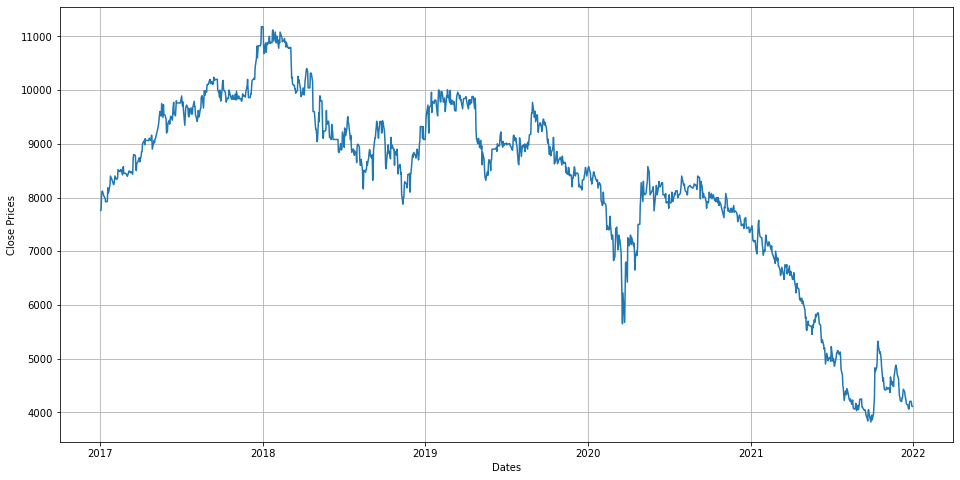

In [74]:
# dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
# data = pd.read_csv('../Datasets/'+name_dataset+'.csv', 
#                    sep=',', parse_dates=['Date'], index_col='Date',date_parser=dateparse)
data = yf.download(symbol_dataset, start=start_date, end=end_date)
data

if data.shape[0]>=1250:
    term_status = " long"
elif data.shape[0]>=250:
    term_status = " mid"
else:
    term_status = " short"
    
# data = pd.read_csv('../Datasets/'+name_dataset+'.csv')
#data = data.loc['2012-11-10':'2017-11-10']
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel(column_dataset_obs+' Prices')
plt.plot(data[column_dataset_obs]);

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1262 entries, 2017-01-02 to 2021-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1262 non-null   float64
 1   High       1262 non-null   float64
 2   Low        1262 non-null   float64
 3   Close      1262 non-null   float64
 4   Adj Close  1262 non-null   float64
 5   Volume     1262 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 69.0 KB


## Plotting Data

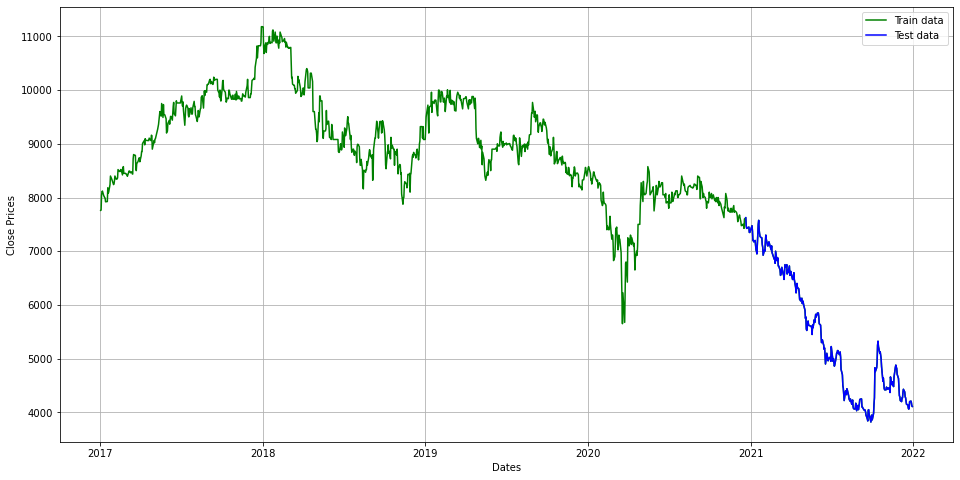

In [76]:
train_data, test_data = data[0:int(len(data)*0.8)], data[int(len(data)*0.8):]
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel(column_dataset_obs+' Prices')
plt.plot(data[column_dataset_obs], 'green', label='Train data')
plt.plot(test_data[column_dataset_obs], 'blue', label='Test data')
plt.legend()

In [77]:
print("Jumlah Train Data: " + str(len(train_data)))
print("Jumlah Test Data: " + str(len(test_data)))

Jumlah Train Data: 1009
Jumlah Test Data: 253


## ARIMA Model

In [78]:
# from pylab import rcParams
# rcParams['figure.figsize'] = 14, 8
# data_arima = data['Open']
# from statsmodels.tsa.seasonal import seasonal_decompose
# result = seasonal_decompose(data_arima[-1000:], model='multiplicative', freq=30)
# plt.figure(figsize=(16,8))
# fig = result.plot()
# plt.show()

In [81]:
train_arima = train_data[column_dataset_obs]
test_arima = test_data[column_dataset_obs]

history = [x for x in train_arima]
y = test_arima
# make first prediction
predictions = list()
model = sm.tsa.arima.ARIMA(history, order=(p,d,q))
model_fit = model.fit()
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0])
# rolling forecasts
for i in range(1, len(y)):
    # predict
    model = sm.tsa.arima.ARIMA(history, order=(p,d,q))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)

In [82]:
model

### Report Performance of ARIMA Predictions

In [83]:
# mse = mean_squared_error(y, predictions)
# print('MSE: '+str(mse))
print('P: ' + str(p))
print('D: ' + str(d))
print('Q: ' + str(q))
rmse = math.sqrt(mean_squared_error(y, predictions))
print('RMSE: '+ str("{:.2f}".format(rmse)))
mae = mean_absolute_error(y, predictions)
print('MAE: '+ str("{:.2f}".format(mae)))
mape = mean_absolute_percentage_error(y, predictions)
print('MAPE: '+ str("{:.2f}".format(mape*100)) + '%')

P: 2
D: 1
Q: 2
RMSE: 111.03
MAE: 83.04
MAPE: 1.58%


### Plotting Prediction of ARIMA

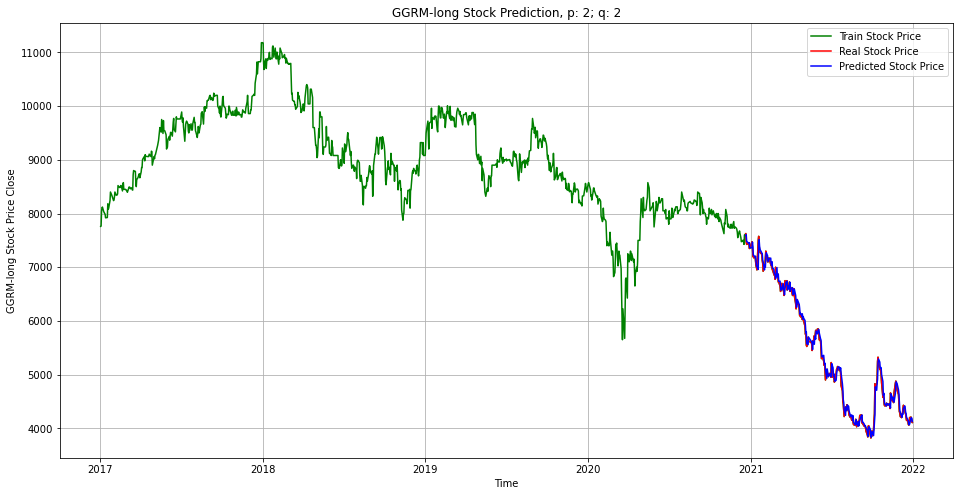

In [84]:
plt.figure(figsize=(16,8))
plt.plot(data.index[:], data[column_dataset_obs], color='green', label = 'Train Stock Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.title(symbol_dataset+ ' - ' + term_status +  ' Stock Prediction, p: '+ str(p) +'; q: '+str(q))
plt.xlabel('Time')
plt.ylabel(symbol_dataset +' Stock Price '+ column_dataset_obs)
plt.legend()
plt.grid(True)
# plt.savefig('arima_model.pdf')
plt.show()

In [85]:
predictions,

([7593.071725912434,
  7605.905553755875,
  7482.640173717672,
  7440.905993044061,
  7456.28061562585,
  7360.894348302509,
  7362.794700017773,
  7467.478763244309,
  7373.04404623784,
  7225.619064826148,
  7219.858386013587,
  7182.008665947126,
  7204.067967923128,
  7107.1214171202655,
  7043.387147961506,
  7011.55208237275,
  6958.934052068857,
  7460.702789030341,
  7512.466131109799,
  7390.492348561137,
  7330.432065693499,
  7284.450277453166,
  7259.7851841323345,
  7256.620863381089,
  7139.6953623587615,
  7096.152858005033,
  6950.064193247439,
  7041.3569467512625,
  7001.6432428503485,
  7168.0217666555245,
  7272.038053859256,
  7212.685758954079,
  7107.243869034696,
  7109.619329826083,
  7149.500142489687,
  7170.845484649219,
  7057.486718581912,
  7039.552942073419,
  7100.49337795113,
  6982.86672030093,
  6966.195819978047,
  6888.801019223661,
  6866.805209852833,
  6859.250539047386,
  6787.886399805467,
  6993.151078821956,
  6820.754756748947,
  6839.80551

## Visualize Test Data The Prediction and Real

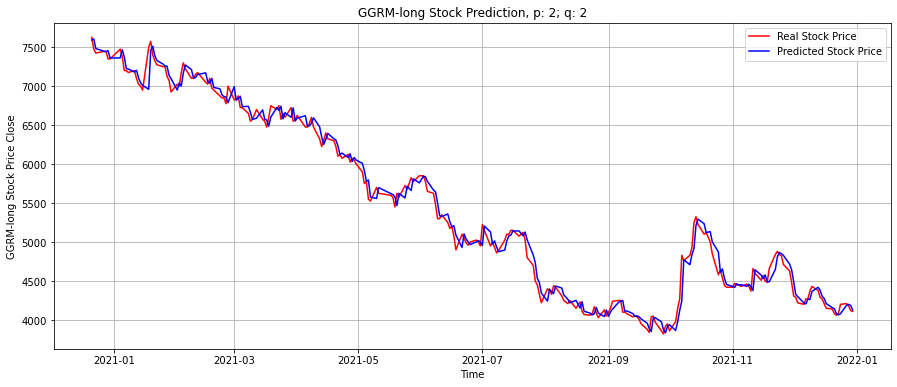

In [86]:
plt.figure()
plt.plot(test_data.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.title(symbol_dataset+ ' - ' + term_status +' Stock Prediction, p: '+ str(p) +'; q: '+str(q))
plt.xlabel('Time')
plt.ylabel(symbol_dataset +' Stock Price '+ column_dataset_obs)
plt.legend()
plt.grid(True)
# plt.savefig('arima_model.pdf')
plt.show()

In [89]:
price_prediction=predictions

In [90]:
new_date = pd.to_datetime(test_data.index)

## Save as new Dataset

In [104]:
new_data = {'Date': new_date,
            'real_close': y,
           'close_arima': price_prediction}

In [105]:
df_new_data = pd.DataFrame(new_data, columns = ['Date', 'real_close','close_arima'])

In [106]:
df_new_data.to_csv('../Datasets/dataset after prediction/'+symbol_dataset+'_ARIMA_'+ str(p) +'_'+ str(q) + '.csv', index=False)

In [107]:
df_new_data

Date  real_close  close_arima
Date                                          
2020-12-21 2020-12-21      7625.0  7593.071726
2020-12-22 2020-12-22      7475.0  7605.905554
2020-12-23 2020-12-23      7425.0  7482.640174
2020-12-28 2020-12-28      7450.0  7440.905993
2020-12-29 2020-12-29      7350.0  7456.280616
...               ...         ...          ...
2021-12-24 2021-12-24      4200.0  4079.087160
2021-12-27 2021-12-27      4210.0  4188.931789
2021-12-28 2021-12-28      4180.0  4200.434057
2021-12-29 2021-12-29      4120.0  4186.319872
2021-12-30 2021-12-30      4110.0  4128.439735

[253 rows x 3 columns]